In [1]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys



sys.path.append(os.path.abspath("../../src"))   
import soporte_regresion as f


pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

In [2]:
df_encoded=pd.read_csv("../../datos/datos2/datos_nulos_minmax_encoded.csv", index_col=0).reset_index(drop=True)

In [3]:
df_encoded.head()

,price,rooms,municipality,status,floor,hasLift,size_MinMax,distance_MinMax,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,bathrooms_1,bathrooms_2,bathrooms_3
0,750.00,689.54,706.81,701.97,701.74,705.69,0.43,0.12,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
1,750.00,704.56,706.36,701.97,678.80,696.33,0.53,0.28,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
2,684.00,695.08,706.81,686.99,682.89,681.67,0.27,0.19,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00
3,600.00,704.56,686.20,701.97,701.74,696.33,0.56,0.65,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
4,600.00,689.54,687.65,701.97,710.54,696.33,0.54,0.78,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00


In [4]:
x= df_encoded.drop(columns="price")
y= df_encoded[["price"]]

In [5]:
x_train,x_test,y_train,y_test= train_test_split(x, y, train_size=0.7, random_state=42, shuffle=True)  

Voy a meter los parametros de mi mejor modelo (modelo 4)

    'max_depth': [7],
    'min_samples_split': [30],
    'min_samples_leaf': [7],
    'max_leaf_nodes': [9]

In [6]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [35,50,65,80,100,120],    #número de árboles que queremos que haga
    'max_features': [4,8,10,13,25,35,45,50],
    'max_depth': [6,7,8],
    'min_samples_split': [25,30,35],
    'min_samples_leaf': [6,7,8], 
    'max_leaf_nodes': [8,9,10]
}

modelo_rf= RandomForestRegressor(random_state=42, bootstrap=True)    #bootstrap es para que haga un muestreo con remplazo (hace que dentro de distintos árboles te pueda coger el mismo dato)
grid_search_rf= GridSearchCV(modelo_rf,
                             params_rf,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)

grid_search_rf.fit(x_train,y_train["price"].values)   #esta puesto así porque se necesita un array de una dimension
modelo_final_rf= grid_search_rf.best_estimator_
modelo_final_rf

RandomForestRegressor(max_depth=6, max_features=8, max_leaf_nodes=8,
                      min_samples_leaf=8, min_samples_split=25, n_estimators=65,
                      random_state=42)

In [7]:
y_pred_test_rf=modelo_final_rf.predict(x_test)
y_pred_train_rf=modelo_final_rf.predict(x_train)

In [8]:
df_metricas_rf= f.metricas(y_train,y_pred_train_rf, y_test , y_pred_test_rf)
df_metricas_rf.T

,r2_score,MAE,MSE,RMSE
train,0.41,30.95,"1,544.02",39.29
test,0.33,33.86,"1,805.86",42.50


PRUEBA de modelo con otros parametros



In [9]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [80,100,120],    #número de árboles que queremos que haga
    'max_features': [4,8,10,13],
    'max_depth': [6,7,8],
    'min_samples_split': [25,30,35],
    'min_samples_leaf': [6,7,8], 
    'max_leaf_nodes': [8,9,10]
}

modelo_rf= RandomForestRegressor(random_state=42, bootstrap=True)    #bootstrap es para que haga un muestreo con remplazo (hace que dentro de distintos árboles te pueda coger el mismo dato)
grid_search_rf= GridSearchCV(modelo_rf,
                             params_rf,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)

grid_search_rf.fit(x_train,y_train["price"].values)   #esta puesto así porque se necesita un array de una dimension
modelo_final_rf= grid_search_rf.best_estimator_
modelo_final_rf

RandomForestRegressor(max_depth=6, max_features=8, max_leaf_nodes=9,
                      min_samples_leaf=8, min_samples_split=25, n_estimators=80,
                      random_state=42)

In [10]:
y_pred_test_rf=modelo_final_rf.predict(x_test)
y_pred_train_rf=modelo_final_rf.predict(x_train)

In [11]:
df_metricas_rf= f.metricas(y_train,y_pred_train_rf, y_test , y_pred_test_rf)
df_metricas_rf.T

,r2_score,MAE,MSE,RMSE
train,0.41,30.70,"1,538.98",39.23
test,0.33,33.71,"1,791.94",42.33


### De estos 2 modelos de Random Forest me quedo con el modelo 2 porque aunque cuenta con un poco más de over fitting (nada exagerado), creo que merece la pena por las mejoras tanto en mayor r cuadrado como en menores errores

In [12]:
df_importancia=pd.DataFrame(modelo_final_rf.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
df_importancia

,Importancia
distance_MinMax,0.37
municipality,0.21
floor,0.17
size_MinMax,0.10
rooms,0.04
status,0.03
exterior_True,0.02
hasLift,0.02
propertyType_flat,0.02
exterior_False,0.02


<Axes: xlabel='Importancia', ylabel='None'>

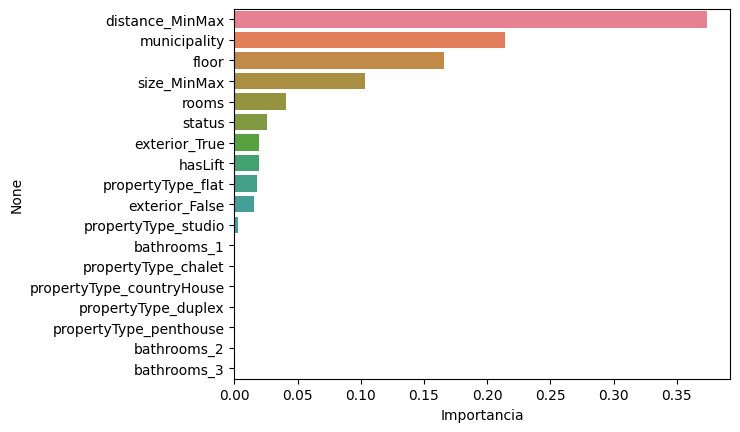

In [13]:
sns.barplot(x="Importancia", y= df_importancia.index, hue=df_importancia.index, data= df_importancia)

No dropeo esas columnas porque me genera mucho Over fitting hacerlo

In [33]:
modelo_gb= GradientBoostingRegressor(random_state=42)

params_gb={    
    'n_estimators': [90,100,110],    #número de árboles que queremos que haga
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3,4, 5, 6],
    'min_samples_split': [8,10,12],
    'min_samples_leaf': [1,2,4]
}
random_search_gb= GridSearchCV(modelo_gb,
                             params_gb,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)


In [34]:
random_search_gb.fit(x_train,y_train["price"].values)   
modelo_final_gb= random_search_gb.best_estimator_
modelo_final_gb

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=8,
                          n_estimators=110, random_state=42)

In [35]:
y_pred_test_gb=modelo_final_gb.predict(x_test)
y_pred_train_gb=modelo_final_gb.predict(x_train)

In [ ]:
df_metricas_gb= f.metricas(y_train,y_pred_train_gb, y_test , y_pred_test_gb)
df_metricas_gb.T

,r2_score,MAE,MSE,RMSE
train,0.44,31.37,"1,468.54",38.32
test,0.34,34.28,"1,765.19",42.01


In [24]:
df_importancia_gb=pd.DataFrame(modelo_final_gb.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
df_importancia_gb

,Importancia
distance_MinMax,0.38
municipality,0.26
size_MinMax,0.18
floor,0.13
rooms,0.02
status,0.02
propertyType_flat,0.01
exterior_True,0.01
exterior_False,0.00
hasLift,0.00


<Axes: xlabel='Importancia', ylabel='None'>

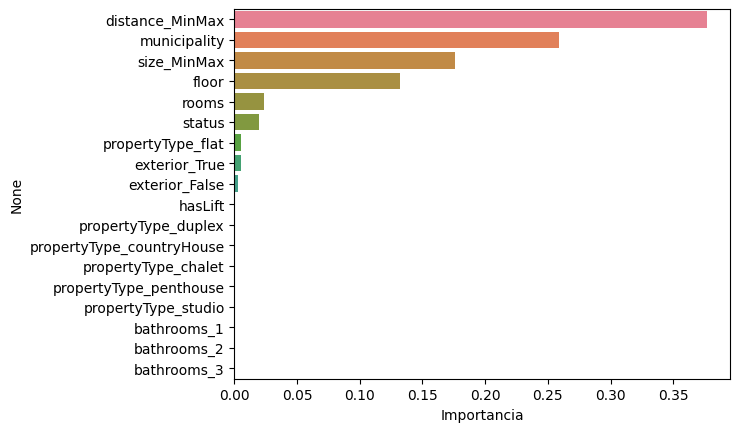

In [25]:
sns.barplot(x="Importancia", y= df_importancia_gb.index, hue=df_importancia_gb.index, data= df_importancia_gb)

### *XG BOOST*

    'max_depth': [7],
    'min_samples_split': [30],
    'min_samples_leaf': [7],
    'max_leaf_nodes': [9]

In [14]:
from xgboost import XGBRegressor

In [15]:
modelo_xg= XGBRegressor(random_state=42, eval_metric= "rmse")
params_xg={    
    'n_estimators': [20,30,50,70,120, 150, 200],    #número de árboles que queremos que haga
    'learning_rate': [0.01,0.04,0.08, 0.1,0.15, 0.2],
    'max_depth': [6,8,10,12,15,20],
    'min_child_weight': [5,10,12,15,17],  #es como el min nsample leaf
    'subsample': [0.5,0.8, 1.0],
    'colsample_bytree': [0.2,0.5,0.8, 1.0]
}
random_search_xg= GridSearchCV(modelo_xg,
                               params_xg,
                               cv=3,
                               scoring= "neg_mean_squared_error",
                               n_jobs=-1 )

In [16]:
random_search_xg.fit(x_train,y_train["price"].values)   
modelo_final_xg= random_search_xg.best_estimator_
modelo_final_xg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=15, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [17]:
y_pred_test_xg=modelo_final_xg.predict(x_test)
y_pred_train_xg=modelo_final_xg.predict(x_train)

In [18]:
df_metricas_xg= f.metricas(y_train,y_pred_train_xg, y_test , y_pred_test_xg)
df_metricas_xg.T

,r2_score,MAE,MSE,RMSE
train,0.54,26.58,"1,197.97",34.61
test,0.41,31.02,"1,585.60",39.82


In [19]:
df_importancia_xg=pd.DataFrame(modelo_final_xg.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
df_importancia_xg

,Importancia
municipality,0.17
distance_MinMax,0.14
floor,0.11
status,0.10
propertyType_studio,0.09
rooms,0.09
propertyType_flat,0.08
exterior_True,0.07
hasLift,0.05
size_MinMax,0.05


El modelo XGBoost lo descarto